# Travail 1 - Kepler et Runge-Kutta 4

## Introduction

Nous allons dans ce travail étudier la dynamique newtonienne du système Terre-Lune, en résolvant numériquement les équations de Newton. Nous prendrons pour conditions initiales dans le repère de la Terre que la Lune passe à son périgée ($362600000{\rm m}$) à une vitesse de $1083.4{\rm m/s}$. Nous vérifierons que la trajectoire est une ellipse et présenterons les paramètres calculés pour cette ellipse. Ensuite, nous nous intéresserons à l'ordre de convergence de la méthode utilisée. Enfin, nous étudierons la trajectoire d'un astéroïde qui traverse le centre de l'ellipse avec une vitesse $(v_x,v_y)=(-500{\rm m/s},500 {\rm m/s})$ lorsque la Lune est à son apogée.

## Système Terre - Lune

### Paramètres et conditions initiales

Tout d'abord, importons les librairies utiles à notre travail.

In [42]:
import numpy
from math import log,sqrt
from matplotlib import pyplot
%matplotlib inline

Ensuite, entrons les données caractéristiques du système. $T$ est la durée durant laquelle nous voulons simuler les trajectoires de la lune et de la Terre et $N$ est le paramètre qui définit le nombre de lignes des matrices de données de chaque astre.

In [3]:
T = 3600*24*30
dt = 10
N = 1+int(T/dt)

mT = 5.972*10**24
mL = 7.348*10**22
G = 6.67408*10**-11

Nous savons qu'une force gravitationnelle (force attractive) existe entre la Terre et la lune. Selon la loi de Newton, celle-ci s'écrit 

$${\bf F}_{L,T}=-{\bf F}_{T,L}=-Gm_T m_L\dfrac{{\bf x_L}-{\bf x_T}}{(x_L-x_T)^3}$$

pour deux masses $m_L$ et $m_T$ s'attirant avec des forces mutuellement opposées séparées d'une distance $r$ qui est la norme du vecteur partant du centre de la Terre jusqu'au centre de la lune. Nos conditions initiales étant données dans le repère de la Terre, nous allons résoudre les équations de Newton dans le repère de la Terre également. Nous avons donc besoin de reformuler notre équation avec comme variable le vecteur ${\bf r} = {\bf x_L}-{\bf x_T}$. 

$$ {\bf \ddot{r}_{LT}} = {\bf \ddot{x}_L}-{\bf \ddot{x}_T} = \frac{1}{m_L}{\bf F}_{L,T} - \frac{1}{m_T}{\bf F}_{T,L} = -Gm_T \dfrac{{\bf x_L}-{\bf x_T}}{(x_L-x_T)^3} - Gm_L\dfrac{{\bf x_L}-{\bf x_T}}{(x_L-x_T)^3}$$

Ce qui devient

$$ {\bf \ddot{r}_{LT}} = -G(m_T+m_L)\dfrac{{\bf r_{LT}}}{r_{LT}^3} $$

Nous allons tout d'abord transformer l'équation de Newton, qui est du deuxième ordre, en un système de deux équations du premier ordre. Pour ce faire, nous introduisons le vectreur $u_{LT} $ définit comme 

$$ u_{LT}  = \begin{pmatrix} x_{LT}\ , y_{LT}\ , v_{x\,LT}\ , v_{y\,LT}\end{pmatrix} $$

Notre système d'équations différentielles devient

$$ \dot{u}_{LT} = f(u_{LT}) $$ 

Nous obtenons donc

$$ f(u_{LT}) = \begin{pmatrix} v_{x\,LT}\ , v_{y\,LT}\ , -\dfrac{ m_T\, G\, x_{LT}}{ \left[x_{LT}^2 + y_{LT}^2\right]^{3/2}}\ , -\dfrac{ m_T\, G\, y_{LT}}{ \left[x_{LT}^2 + y_{LT}^2\right]^{3/2}}  \end{pmatrix} $$

Encodons à présent les conditions initiales. Nous nommons $dataLT$ la matrice de données de la lune dans le repère de la Terre. Elle comporte quatre colonnes. Chaque ligne se présentera comme $ u_{LT}  = \begin{pmatrix} x_{LT}\ , y_{LT}\ , v_{x\,LT}\ , v_{y\,LT}\end{pmatrix} $.

In [4]:
dataLT = numpy.empty((N,4)) 

# dataL0 = [362600000,0,0,1083.4*mT/(mT+mL)]
# dataT0 = [0,0,0,-1083.4*mL/(mT+mL)] #1083.4349740009823

dataLT0 = [362600000,0,0,1083.4349740009823]

dataLT[0] = dataLT0

### "Fonction d'évolution"

Nous ne généraliserons pas la fonction $f$ à plus de deux corps, par soucis de lisibilité car cela n'est pas nécessaire.
La première ligne de $out$ est la trajectoire de la Terre, la seconde celle de la Lune.

In [5]:
def f(uLT): 
    return numpy.array([uLT[2],uLT[3],-G*(mT+mL)*uLT[0]/(uLT[0]**2+uLT[1]**2)**(3/2),\
                        -G*(mT+mL)*uLT[1]/(uLT[0]**2+uLT[1]**2)**(3/2)])     

### Implémentation de Runge Kutta 4

Ci-dessous la méthode "Runge Kutta 4" appliquée directement à la trajectoire de la Lune.

In [6]:
def rk4(f,uLT,dt): 
    k1 = f(uLT)
    k2 = f(uLT+dt/2*k1)
    k3 = f(uLT+dt/2*k2)
    k4 = f(uLT+dt*k3)
    
    return uLT+dt/6*(k1+2*k2+2*k3+k4)

### Calcul de la trajectoire

Calculons maintenant la trajectoire. Notons que $dataLT[t]$ est le vecteur $u_{LT}$ input de $f$ au temps $t$.

In [7]:
for t in range(1,N):
    
    dataLT[t] = rk4(f,dataLT[t-1],dt)

Affichons la position de la lune dans le repère de la Terre

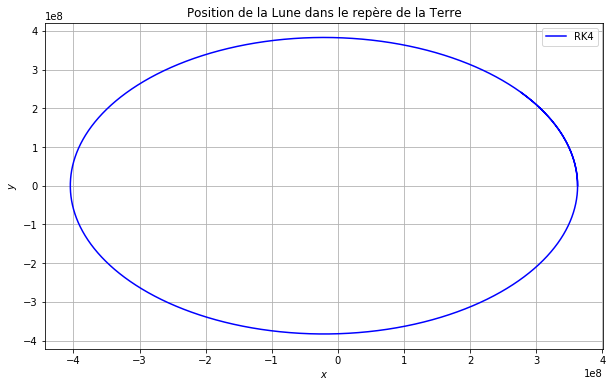

In [8]:
pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(dataLT[:,0],dataLT[:,1], 'b-', label='RK4')
pyplot.title('Position de la Lune dans le repère de la Terre')
pyplot.legend();
pyplot.show();

### Paramètres : grand et petit axes, excentricité et période

Etant donné que la Lune commence sur l'axe $x$ avec une vitesse le long de $y$, les demi-grand axe $a$ et demi-petit axe $b$ sont alignés avec les axes $x$ et $y$ respectivement. Nous pouvons alors les calculer à par des minima et maxima de la trajectoire le long des composantes.

In [9]:
def computeParameters(posEllipse):
    a = 1/2*(numpy.max(posEllipse[:,0])-numpy.min(posEllipse[:,0]))
    b = 1/2*(numpy.max(posEllipse[:,1])-numpy.min(posEllipse[:,1]))
    e = numpy.sqrt(1-b**2/a**2)
    return numpy.array([a,b,e])

In [10]:
parameters = computeParameters(dataLT)

a = parameters[0]
b = parameters[1]
e = parameters[2]

print("a =", a)
print("b =", b)
print("e =", e)

a = 383663116.433
b = 383084497.255
e = 0.0549000295925


In [11]:
# Compute the parameters a,b,e

minX = 0
for i in range(1,N-1):
    if (dataLT[i+1,0]>=dataLT[i,0] and dataLT[i,0]<dataLT[i-1,0]):
        minX = dataLT[i,0]
        break
        
maxX = 0
for i in range(1,N-1):
    if (dataLT[i+1,0]<=dataLT[i,0] and dataLT[i,0]>dataLT[i-1,0]):
        maxX = dataLT[i,0]
        break

minY = 0
for i in range(1,N-1):
    if (dataLT[i+1,1]>=dataLT[i,1] and dataLT[i,1]<dataLT[i-1,1]):
        minY = dataLT[i,1]
        break
        
maxY = 0
for i in range(1,N-1):
    if (dataLT[i+1,1]<=dataLT[i,1] and dataLT[i,1]>dataLT[i-1,1]):
        maxY = dataLT[i,1]
        break
        
print("minX =", minX)
print("maxX =", maxX)
print("minY =", minY)
print("maxY =", maxY)
        
a = abs(maxX-minX)/2
b = abs(maxY-minY)/2
e = numpy.sqrt(1-b**2/a**2)

print("a =", a)
print("b =", b)
print("e =", e)

minX = -404726232.867
maxX = 362599999.995
minY = -383084497.255
maxY = 383084497.254
a = 383663116.431
b = 383084497.255
e = 0.0549000294758


In [12]:
# This method will not work for negative values of initial conditions

for i in range(2,N-1):
    if (dataLT[i+1,0]<=dataLT[i,0] and dataLT[i,0]>dataLT[i-1,0]):
        period = i*dt
        break
        
print("period in seconds =", period)
print("period in 24h-days =", period/24/3600)

period in seconds = 2350680
period in 24h-days = 27.206944444444446


Trouvons à présent l'apogée de l'orbite de la Lune autour de la Terre (cette donnée nous sera utile plus loin dans le travail).

In [13]:
for i in range(1,N-1):
    if (dataLT[i+1,0]>=dataLT[i,0] and dataLT[i,0]<dataLT[i-1,0]):
        indexApogee = i
        break

uLT_apogee = dataLT[indexApogee]
print(uLT_apogee)

[ -4.04726233e+08   8.74554030e+02  -2.21930424e-03  -9.70664834e+02]


## Ordre de convergence

Implémentons une fonction qui quantifie l'erreur sur les résultats de la simulation. Notre fonction prend les résultats calculés pour un certain dt ainsi que les données calculées avec le plus petit dt disponible et renvoie la valeur absolue de la différence entre le demi-grand axe des ellipses calculée dans les deux cas.

In [14]:
def get_diffgrid(data_current, data_fine):
    
    #parameters_current = computeParameters(data_current)
    #parameters_fine = computeParameters(data_fine)
    
    #diffgrid = abs(parameters_current[0]-parameters_fine[0])
    
    diffgrid = abs(data_current[-1,0]-data_fine[-1,0])
    
    return diffgrid

Calculons maintenant la trajectoire de la Lune pour plusieurs pas de temps différents 

In [15]:
r = 2

#h = 10
h = 1000
dt_values = numpy.array([h, r*h, r**2*h, r**3*h])

dataLT_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N2 = int(T/dt)+1
        
    dataLT = numpy.empty((N2, 4))
    
    dataLT[0] = dataLT0

    for t in range(1,N2):
        dataLT[t] = rk4(f, dataLT[t-1], dt)
    
    dataLT_values[i] = dataLT

Calculons les erreurs par rapport à nos données les plus fine grâce à notre fonction get_diffgrid 

In [16]:
diffgridLT = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i in range(len(dt_values)):
    
    diffgridLT[i] = get_diffgrid(dataLT_values[i], dataLT_values[0])

In [17]:
print(diffgridLT)

[0.0 0.031296491622924805 0.55216765403747559 9.5351797938346863]


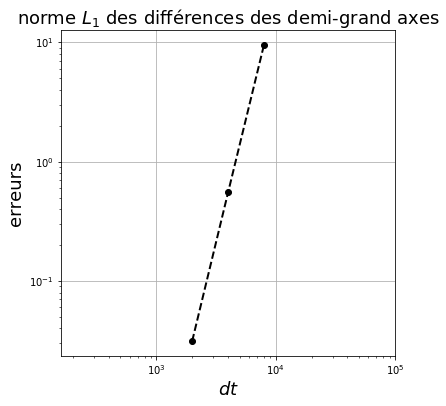

In [18]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.title(r'norme $L_1$ des différences des demi-grand axes', fontsize=18)
pyplot.xlabel(r'$dt$', fontsize=18)
pyplot.ylabel(r'erreurs', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[1:], diffgridLT[1:], color='k', ls='--', lw=2, marker='o');

Calculons enfin l'ordre de convergence $\alpha$ à partir de ces erreurs

In [19]:
alpha = numpy.empty_like(dt_values[:-2], dtype=numpy.ndarray)

for i in range(1, len(dt_values)-1):
    
    #alpha[i-1] = (log(diffgridLT[i+1])-log(diffgridLT[i])) / log(r)
    alpha[i-1] = (log(get_diffgrid(dataLT_values[i+1], dataLT_values[i]))\
                  -log(get_diffgrid(dataLT_values[i], dataLT_values[i-1]))) / log(r)

print(alpha)

[4.056853722365219 4.108200812713604]


## Système Terre - Lune - astéroïde

A présent, la partie avec l'astéroïde. Il faut tout d'abord repérer, dans le repère de la Terre, le centre de l'ellipse que parcours la Lune autour de la Terre.

In [20]:
#Xcenter = (maxX+minX)/2
#Ycenter = (maxY+minY)/2
Xcenter = 1/2*(numpy.max(dataLT[:,0])+numpy.min(dataLT[:,0]))
Ycenter = 1/2*(numpy.max(dataLT[:,1])+numpy.min(dataLT[:,1]))

La nouvelle fonction "d'évolution" du système doit maintenant faire évoluer le vecteur $u_{AT} = (x_{AT},y_{AT},v_{x\,AT},v_{y\,AT})$ des coordonnées de l'astéroïde dans le repère de la Terre. Nous négligeons l'influence de l'astéroïde sur l'évolution du vecteur $u_{LT}$ de la Lune qui restera donc inchangée. 

La force gravitationnelle agissant sur l'astéroïde se sépare en deux contributions: l'attraction de la Terre et celle de la Lune. Avec les notations introduites précédemment, nous pouvons écrire l'accélération de l'astéroïde dans le repère de la Terre comme 

$$ {\bf \ddot{r}_{AT}} = -G(m_T+m_A)\dfrac{{\bf r_{AT}}}{r_{AT}^3} - G m_L\dfrac{{\bf r_{AT}}-{\bf r_{LT}}}{(r_{AT}-r_{LT})^3}$$

Expression dont nous avons déjà décrit l'obtention du premier terme dans le cas de l'attraction Terre-Lune. Le deuxième terme n'est que l'expression de la simple attraction newtonienne de deux masses. Nous négligeons dans nos calculs la masse $m_A$ de l'astéroïde pour obtenir

$$ {\bf \ddot{r}_{AT}} \approx -G m_T\dfrac{{\bf r_{AT}}}{r_{AT}^3} - G m_L\dfrac{{\bf r_{AT}}-{\bf r_{LT}}}{(r_{AT}-r_{LT})^3}$$

In [21]:
def f_ast(uLT,uAT): 
    out = numpy.empty((2,4))  
    out[0] = numpy.array([uLT[2],\
                          uLT[3],\
                          -G*(mT+mL)*uLT[0]/(uLT[0]**2+uLT[1]**2)**(3/2),\
                          -G*(mT+mL)*uLT[1]/(uLT[0]**2+uLT[1]**2)**(3/2)])
    out[1] = numpy.array([uAT[2],\
                          uAT[3],\
                          -G*mT*uAT[0]/(uAT[0]**2+uAT[1]**2)**(3/2) + \
                          -G*mL*(uAT[0]-uLT[0])/((uAT[0]-uLT[0])**2+(uAT[1]-uLT[1])**2)**(3/2),\
                          -G*mT*uAT[1]/(uAT[0]**2+uAT[1]**2)**(3/2) + \
                          -G*mL*(uAT[1]-uLT[1])/((uAT[0]-uLT[0])**2+(uAT[1]-uLT[1])**2)**(3/2)])
    return out

Réécrivons la méthode de Runge-Kutta

In [22]:
def rk4_ast(f_ast,uLT,uAT,dt): 
    k1 = f_ast(uLT,uAT)
    k2 = f_ast(uLT+dt/2*k1[0,:],uAT+dt/2*k1[1,:])
    k3 = f_ast(uLT+dt/2*k2[0,:],uAT+dt/2*k2[1,:])
    k4 = f_ast(uLT+dt*k3[0,:],uAT+dt*k3[1,:])
    
    out = numpy.empty((2,4))
    out[0] = uLT+dt/6*(k1[0,:]+2*k2[0,:]+2*k3[0,:]+k4[0,:])
    out[1] = uAT+dt/6*(k1[1,:]+2*k2[1,:]+2*k3[1,:]+k4[1,:])
    
    return out

Nous avons précédemment trouvé l'instant où la lune est à l'apogée de sa trajectoire autour de la Terre. Nous pouvons donc entrer nos conditions initiales.

In [23]:
T = 3600*1.75*1
dt = 10
N = 1+int(T/dt)

mT = 5.972*10**24
mL = 7.348*10**22
G = 6.67408*10**-11

dataLT = numpy.empty((N,4)) 
dataAT = numpy.empty((N,4)) 

dataLT[0] = uLT_apogee
dataAT[0] = [Xcenter, Ycenter,-500,500]

Calculons la trajectoire

In [24]:
for t in range(1,N):
    
    temp = rk4_ast(f_ast,dataLT[t-1],dataAT[t-1],dt)
    dataLT[t] = temp[0]
    dataAT[t] = temp[1]

Affichons la trajectoire

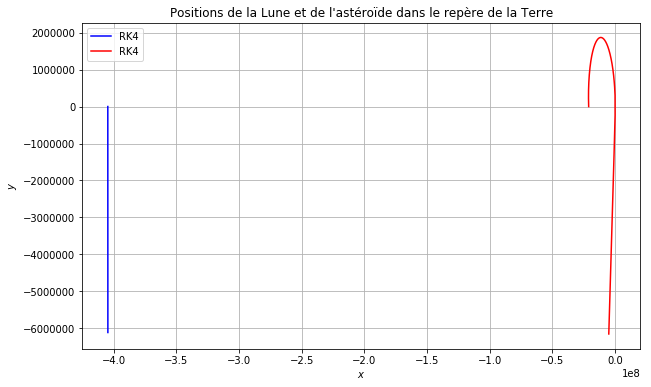

In [25]:
pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(dataLT[:,0],dataLT[:,1], 'b-', label='RK4')
pyplot.plot(dataAT[:,0],dataAT[:,1], 'r-', label='RK4')
pyplot.title('Positions de la Lune et de l\'astéroïde dans le repère de la Terre')
pyplot.legend();
pyplot.show();

### Etude de l'impact entre l'astéroïde et la Terre

LA POSITION ET VITESSE INITIALE DE LA LUNE CHANGENT LES RESULTATS QUANT A LA TRAJECTOIRE DE L ASTEROIDE (FAUSSE LIBERTE DE SIGNE)(CONDITIONS INITIALES DONNEES RELATIVEMENT POUR LA LUNE ET ABSOLUMENT POUR L'ASTEROIDE)

Nous commençons par encoder le rayon de la Terre

In [26]:
radiusT = 6371000

Nous cherchons ensuite l'instant de collision

In [39]:
indexImpact = 0

for t in range(1,N):
    
    if (dataAT[t,0]**2+dataAT[t,1]**2)<=radiusT**2:
        
        indexImpact = t
        break
        
print('Temps écoulé avant l\'impact =', indexImpact*dt, 'secondes')

Temps écoulé avant l'impact = 5630 secondes


Nous trouvons le point d'impact

In [40]:
print('Point d\'impact: x =', dataAT[indexImpact,0], ' y =', dataAT[indexImpact,1])

Point d'impact: x = -6060298.61029  y = 1647507.12772


Nous trouvons la norme de la vitesse d'impact

In [44]:
print('Vitesse d\'impact: v =', sqrt(dataAT[indexImpact,2]**2+dataAT[indexImpact,3]**2), 'm/s')

Vitesse d'impact: v = 9464.815921791213 m/s


### Animations des trajectoires

In [ ]:
from matplotlib import animation
from IPython.display import HTML

def animate_LT(i):
    x = numpy.linspace(0,100,len(data))
    y = data
    line.set_dataL(x,y)
    return line,

fig = pyplot.figure()
ax = pyplot.axes(xlim=(-500000000,500000000),ylim=(-500000000,500000000),xlabel=('x'),ylabel=('y'))

line, = ax.plot([],[],color='#003366', lw=2)

anim = animation.FuncAnimation(fig, animate_LT,interval=1000,frames=period)
#HTML(anim.to_html5_video())
pyplot.show()

In [ ]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()